In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
sns.set(rc={'figure.figsize':(20,8),
           'legend.markerscale': 5})
sns.set_style('whitegrid')

In [ ]:
season_colors = {'Summer': sns.color_palette()[1], 'Winter': sns.color_palette()[0]}
medal_colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'darkorange'}

In [ ]:
START_YEAR = 1945
END_YEAR = 2018

In [ ]:
df_athletes = pd.read_csv('../data/athletes.csv')
df_athletes = df_athletes[(df_athletes['Year'] > START_YEAR) & (df_athletes['Year'] <= END_YEAR)]
df_athletes.head(5)

In [ ]:
df_hosts = pd.read_csv('../data/hosts.csv')
df_hosts = df_hosts[(df_hosts['Year'] > START_YEAR) & (df_hosts['Year'] <= END_YEAR)]
df_hosts.head(5)

In [ ]:
df_nocs = pd.read_csv('../data/nocs.csv')
df_nocs.head(5)

In [ ]:
def medals_by_games(df_athletes: pd.DataFrame) -> pd.Series:
    stats = {'Athlets': df_athletes.shape[0],
             'Medals': df_athletes.dropna(subset=['Medal']).shape[0],
             'Gold': df_athletes[df_athletes['Medal'] == 'Gold'].shape[0],
             'Silver': df_athletes[df_athletes['Medal'] == 'Silver'].shape[0],
             'Bronze': df_athletes[df_athletes['Medal'] == 'Bronze'].shape[0],
            }
    return pd.Series(stats)

In [ ]:
df_medals_by_games = df_athletes.groupby(['Year', 'Season']).apply(medals_by_games).reset_index()
df_medals_by_games.head(5)

In [ ]:
sns.lineplot(data=df_medals_by_games, x='Year', y='Athlets', hue='Season', marker='o', palette=season_colors)

In [ ]:
sns.lineplot(data=df_medals_by_games, x='Year', y='Medals', hue='Season', marker='o', palette=season_colors)

In [ ]:
df_medals_by_nocs = df_athletes.groupby(['Year', 'Season', 'NOC']).apply(medals_by_games).reset_index()
df_medals_by_nocs.head(5)

In [16]:
def medals_ratio(df_athlets: pd.DataFrame) -> pd.DataFrame:
    df_athlets['Medals'] = df_athlets['Medals'] / df_athlets['Medals'].sum()
    df_athlets['Gold'] = df_athlets['Gold'] / df_athlets['Gold'].sum()
    df_athlets['Silver'] = df_athlets['Silver'] / df_athlets['Silver'].sum()
    df_athlets['Bronze'] = df_athlets['Bronze'] / df_athlets['Bronze'].sum()
    return df_athlets

df_medals_ratio_by_nocs = df_medals_by_nocs.groupby(['Year', 'Season']).apply(medals_ratio)
df_medals_ratio_by_nocs.head(5)

,Year,Season,NOC,Athlets,Medals,Gold,Silver,Bronze
0,1948,Summer,AFG,25,0.000000,0.000000,0.000000,0.000000
1,1948,Summer,ARG,295,0.012911,0.010381,0.024648,0.003584
2,1948,Summer,AUS,103,0.018779,0.006920,0.031690,0.017921
3,1948,Summer,AUT,239,0.009390,0.006920,0.007042,0.014337
4,1948,Summer,BEL,182,0.017606,0.017301,0.007042,0.028674


In [41]:
df_hosts_nocs = pd.merge(df_nocs[['NOC', 'Region']], 
                         df_hosts, 
                         left_on='Region', right_on='Country')
df_hosts_nocs.head(10)

,NOC,Region,City,Country,Continent,Year,Opening Ceremony,Closing Ceremony,Season,Games
0,ANZ,Australia,Melbourne,Australia,Oceania,1956,November 22,December 8,Summer,1956 Summer
1,ANZ,Australia,Sydney,Australia,Oceania,2000,September 15,October 1,Summer,2000 Summer
2,AUS,Australia,Melbourne,Australia,Oceania,1956,November 22,December 8,Summer,1956 Summer
3,AUS,Australia,Sydney,Australia,Oceania,2000,September 15,October 1,Summer,2000 Summer
4,AUT,Austria,Innsbruck,Austria,Europe,1964,January 29,February 9,Winter,1964 Winter
5,AUT,Austria,Innsbruck,Austria,Europe,1976,February 4,February 15,Winter,1976 Winter
6,BRA,Brazil,Rio de Janeiro,Brazil,South America,2016,August 5,August 21,Summer,2016 Summer
7,CAN,Canada,Montreal,Canada,North America,1976,July 17,August 1,Summer,1976 Summer
8,CAN,Canada,Calgary,Canada,North America,1988,February 13,February 28,Winter,1988 Winter
9,CAN,Canada,Vancouver,Canada,North America,2010,February 12,February 28,Winter,2010 Winter


In [42]:
df_hosts_nocs.to_csv('hosts_by_nocs.csv', index=False)

<AxesSubplot:xlabel='Year', ylabel='Medals'>

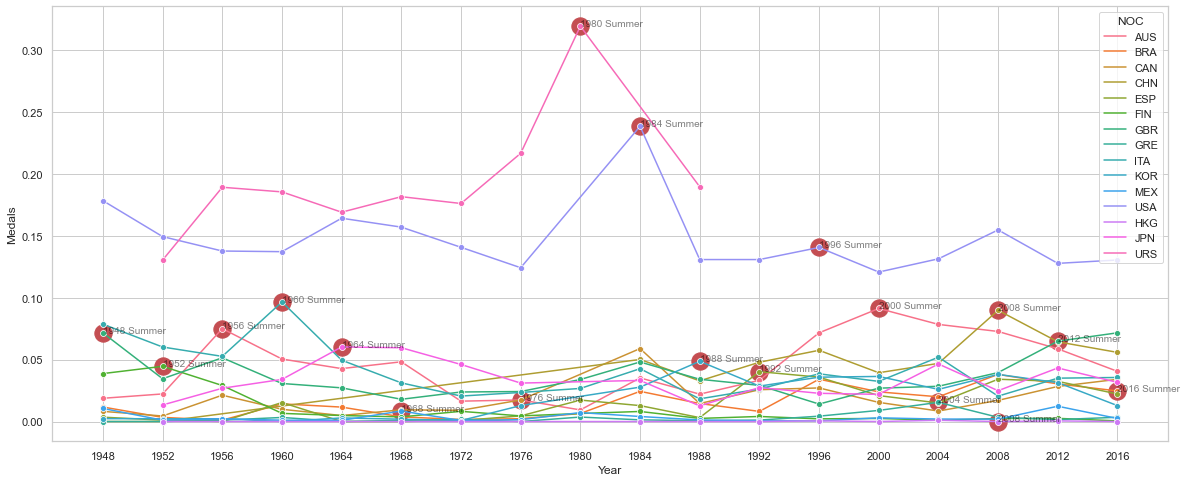

In [19]:
df_hosts_nocs_to_show = df_hosts_nocs[df_hosts_nocs['Season'] == 'Summer']
df_medals_by_nocs_to_show = df_medals_ratio_by_nocs[(df_medals_ratio_by_nocs['Season'] == 'Summer') & 
                                                    (df_medals_ratio_by_nocs['NOC'].isin(df_hosts_nocs_to_show['NOC'].unique()))]

g = sns.lineplot(data=df_medals_by_nocs_to_show, x='Year', y='Medals', hue='NOC', marker='o')
g.set_xticks(df_medals_by_nocs_to_show['Year'].unique())

for _, host_noc in df_hosts_nocs_to_show.iterrows():
    for _, games in df_medals_by_nocs_to_show[(df_medals_by_nocs_to_show['Year'] == host_noc['Year']) &
                                              (df_medals_by_nocs_to_show['NOC'] == host_noc['NOC'])].iterrows():        
        plt.text(games['Year'], games['Medals'], host_noc['Games'], fontdict=dict(color='black', alpha=0.5, size=10))
        plt.scatter(games['Year'], games['Medals'], s=300, c='r')
g

In [20]:
df_athletes_by_year = df_athletes.groupby(['Year', 'Season']).count().reset_index()

<AxesSubplot:xlabel='Year', ylabel='ID'>

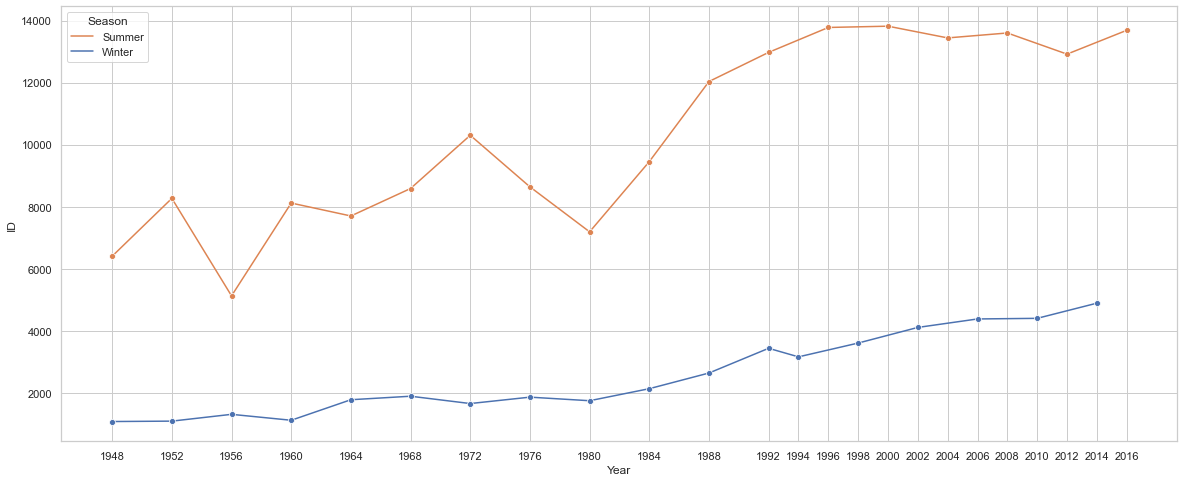

In [21]:
g = sns.lineplot(data=df_athletes_by_year, x="Year", y="ID", hue="Season", marker='o', palette=season_colors)
g.set_xticks(df_athletes_by_year['Year'].unique())
g

In [22]:
df_hosts[df_hosts['Year'].isin([1956, 1972, 1980, 1992, 1994, 2016])]

,City,Country,Continent,Year,Opening Ceremony,Closing Ceremony,Season,Games
23,Cortina d'Ampezzo,Italy,Europe,1956,January 26,February 5,Winter,1956 Winter
24,Melbourne,Australia,Oceania,1956,November 22,December 8,Summer,1956 Summer
31,Sapporo,Japan,Asia,1972,February 3,February 13,Winter,1972 Winter
32,Munich,West Germany,Europe,1972,August 26,September 11,Summer,1972 Summer
35,Lake Placid,United States,North America,1980,February 12,February 24,Winter,1980 Winter
36,Moscow,Soviet Union,Europe,1980,July 19,August 3,Summer,1980 Summer
41,Albertville,France,Europe,1992,February 8,February 23,Winter,1992 Winter
42,Barcelona,Spain,Europe,1992,July 25,August 9,Summer,1992 Summer
43,Lillehammer,Norway,Europe,1994,February 12,February 27,Winter,1994 Winter
54,Rio de Janeiro,Brazil,South America,2016,August 5,August 21,Summer,2016 Summer


<AxesSubplot:xlabel='Year', ylabel='ID'>

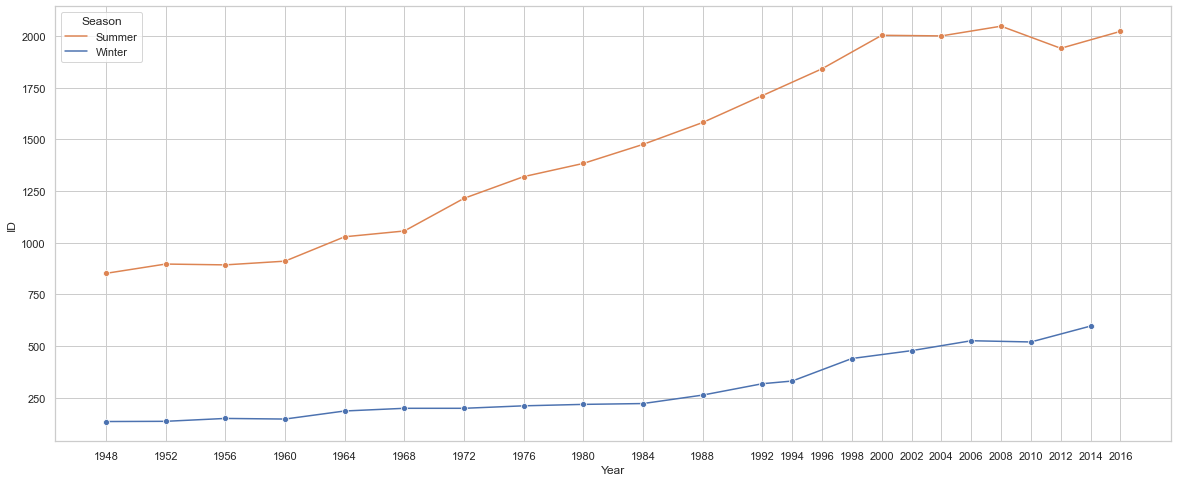

In [23]:
df_medals_by_year = df_athletes.dropna(subset=['Medal']).groupby(['Year', 'Season']).count().reset_index()
g = sns.lineplot(data=df_medals_by_year, x="Year", y="ID", hue="Season", marker='o', palette=season_colors)
g.set_xticks(df_athletes_by_year['Year'].unique())
g

In [24]:
df_hosts['Country'].value_counts()

United States     5
Canada            3
Japan             3
Italy             3
France            2
Australia         2
United Kingdom    2
Norway            2
Austria           2
South Korea       2
Yugoslavia        1
Brazil            1
Russia            1
Greece            1
West Germany      1
China             1
Switzerland       1
Spain             1
Finland           1
Soviet Union      1
Mexico            1
Name: Country, dtype: int64

    Year      Country        City
19  1948  Switzerland  St. Moritz
['SUI']


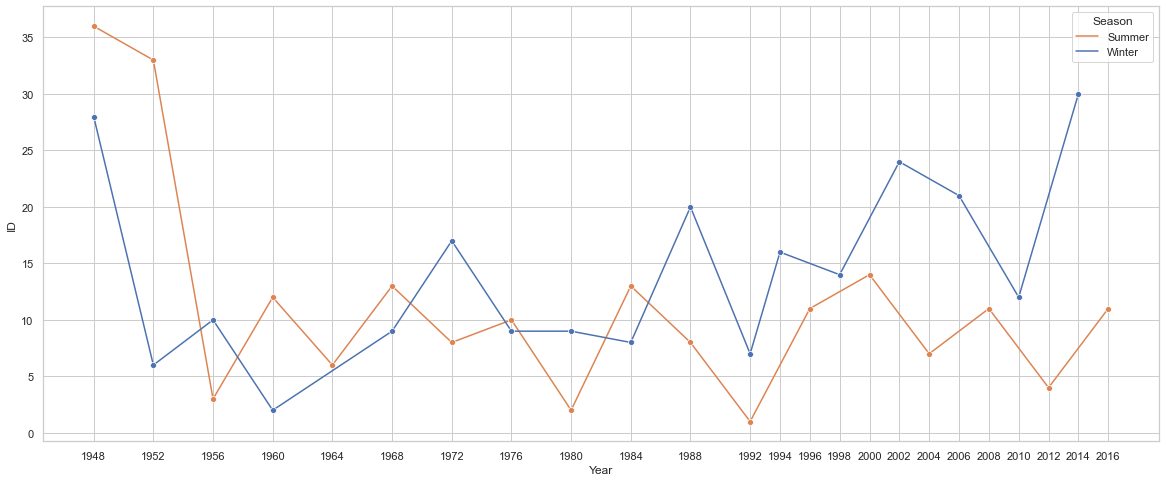

    Year         Country    City
20  1948  United Kingdom  London
52  2012  United Kingdom  London
['GBR']


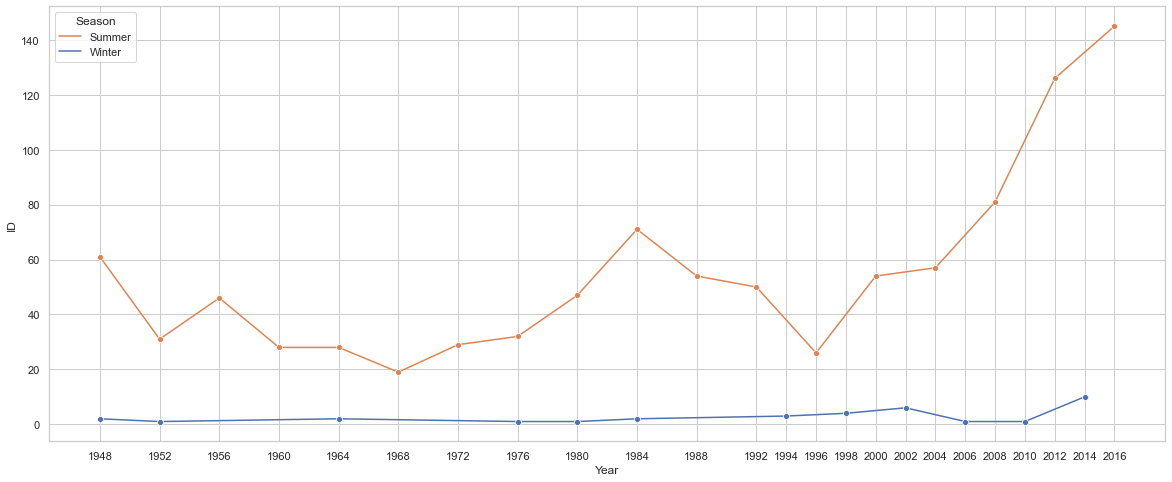

    Year Country         City
21  1952  Norway         Oslo
43  1994  Norway  Lillehammer
['NOR']


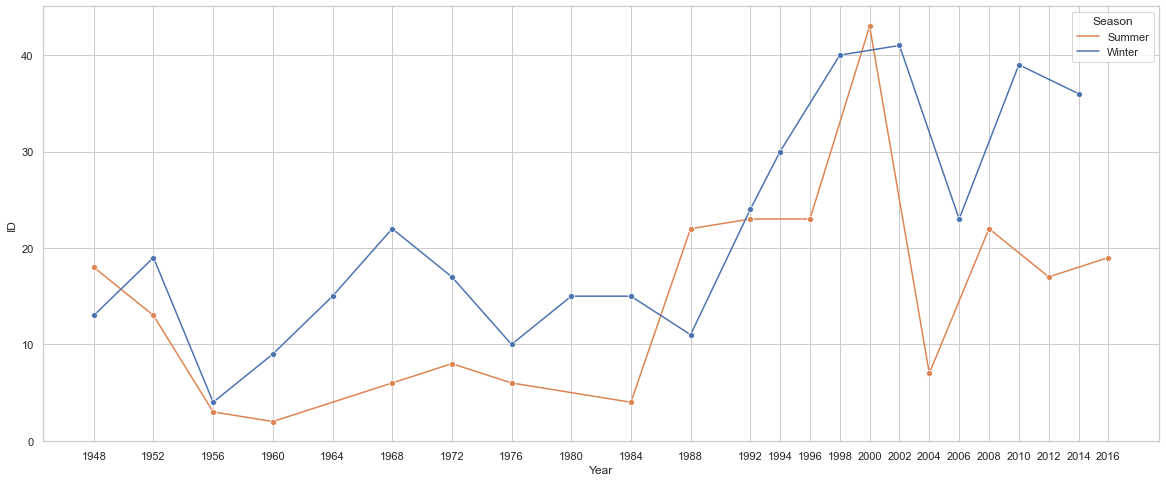

    Year  Country      City
22  1952  Finland  Helsinki
['FIN']


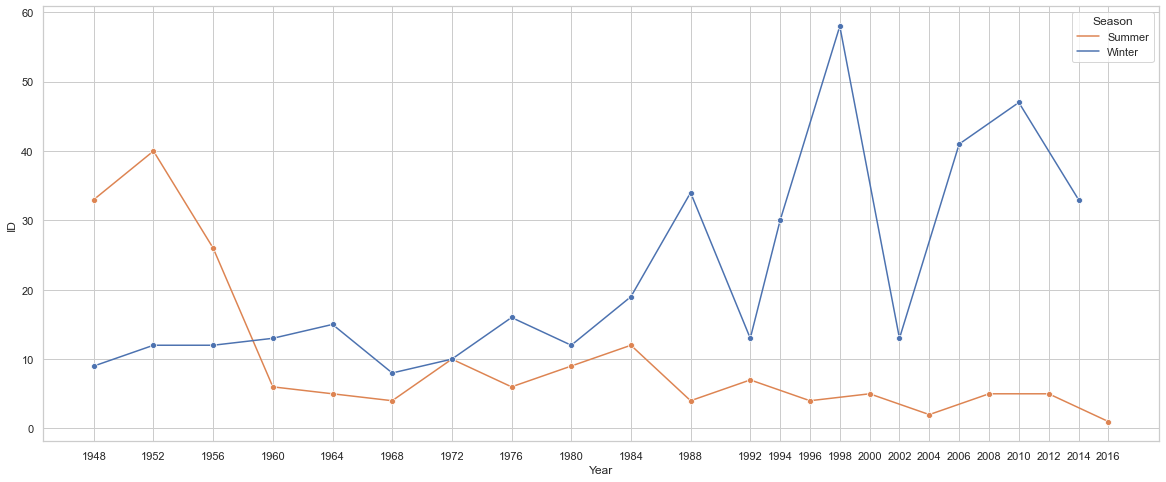

    Year Country               City
23  1956   Italy  Cortina d'Ampezzo
26  1960   Italy               Rome
49  2006   Italy              Turin
['ITA']


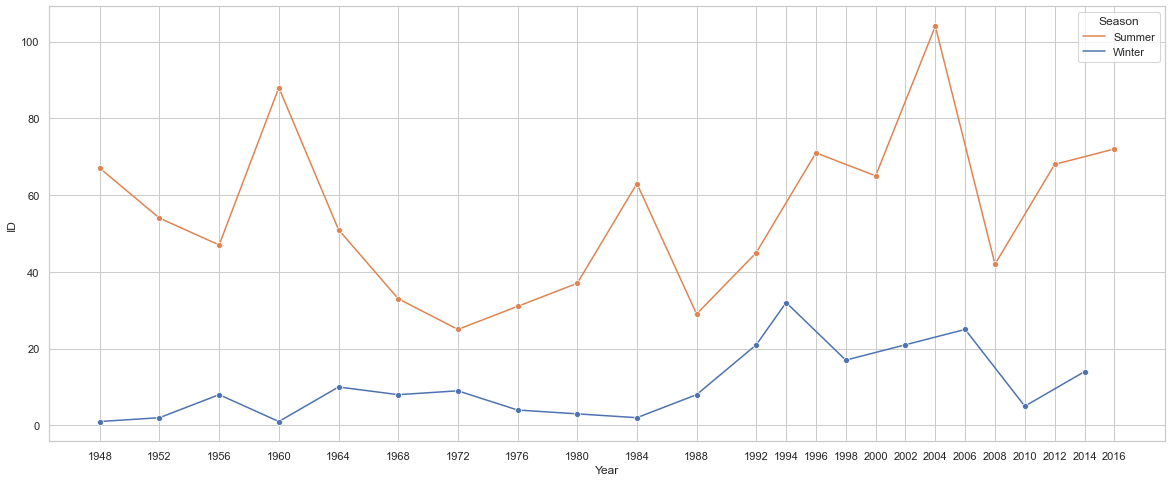

    Year    Country       City
24  1956  Australia  Melbourne
46  2000  Australia     Sydney
['ANZ' 'AUS']


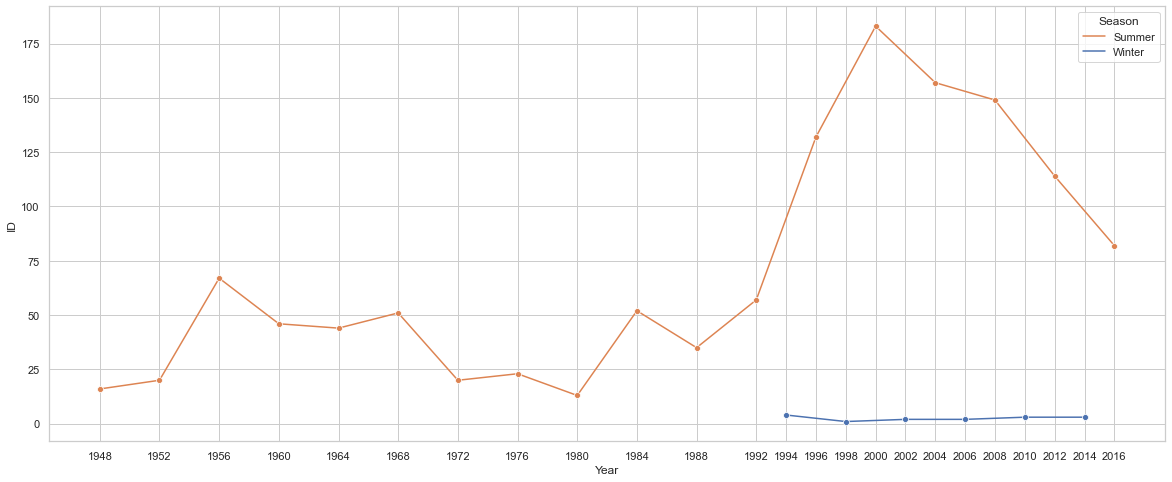

    Year        Country            City
25  1960  United States    Squaw Valley
35  1980  United States     Lake Placid
38  1984  United States     Los Angeles
44  1996  United States         Atlanta
47  2002  United States  Salt Lake City
['USA']


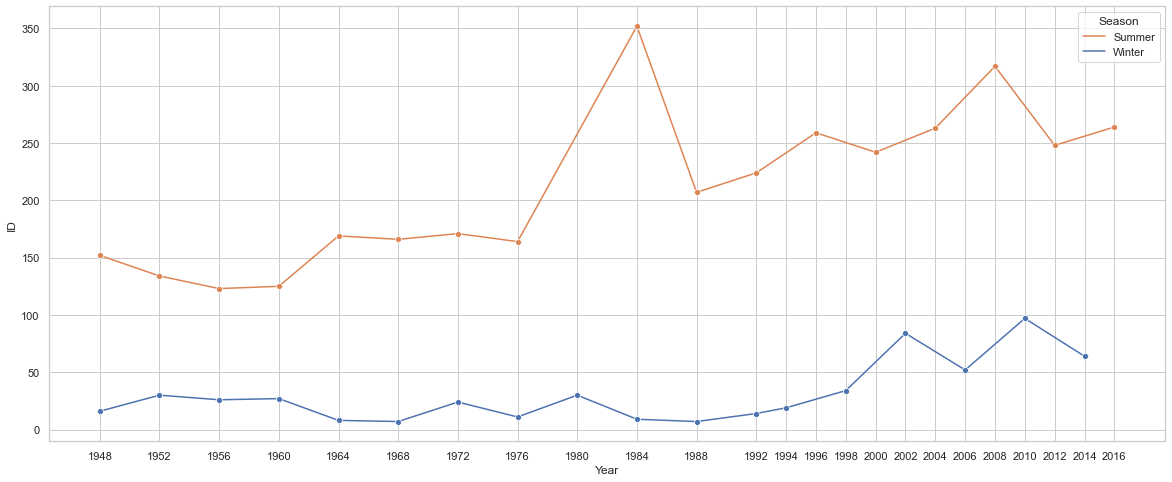

    Year  Country       City
27  1964  Austria  Innsbruck
33  1976  Austria  Innsbruck
['AUT']


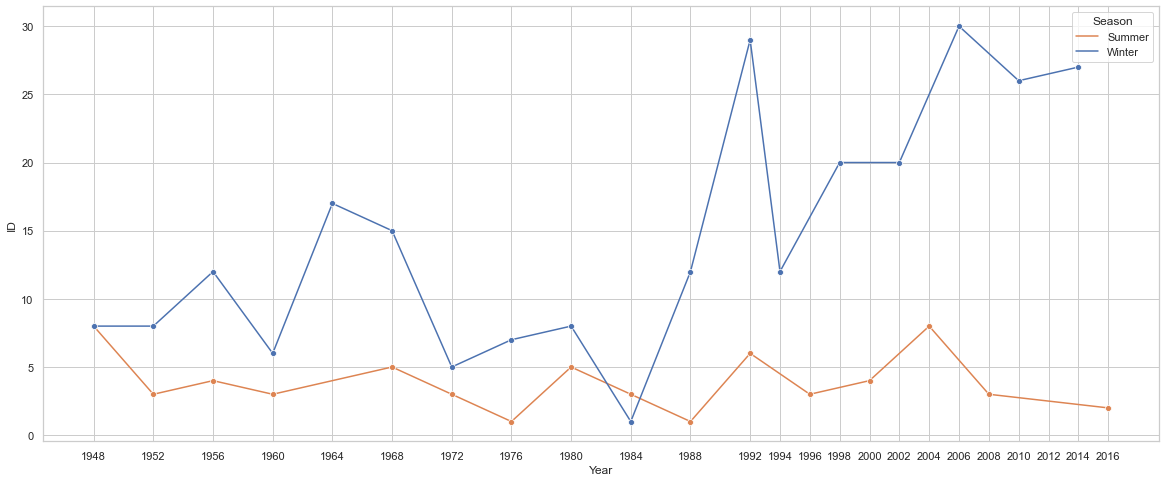

    Year Country     City
28  1964   Japan    Tokyo
31  1972   Japan  Sapporo
45  1998   Japan   Nagano
['JPN']


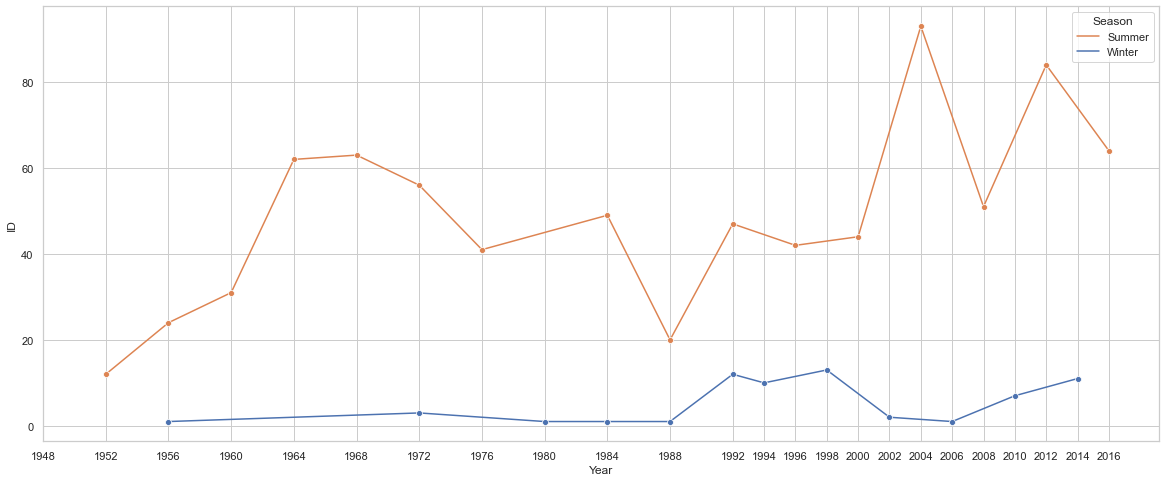

    Year Country         City
29  1968  France     Grenoble
41  1992  France  Albertville
['FRA']


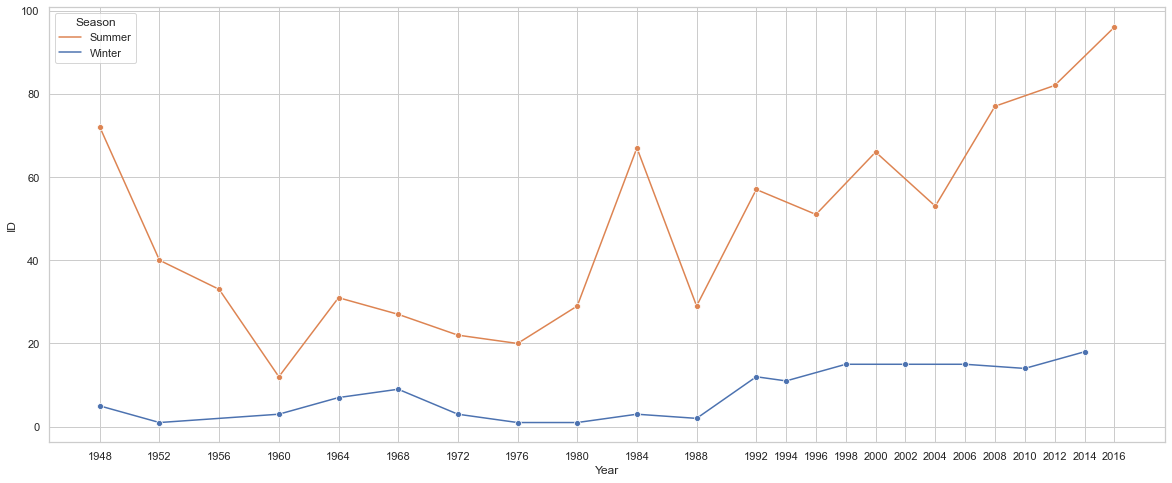

    Year Country         City
30  1968  Mexico  Mexico City
['MEX']


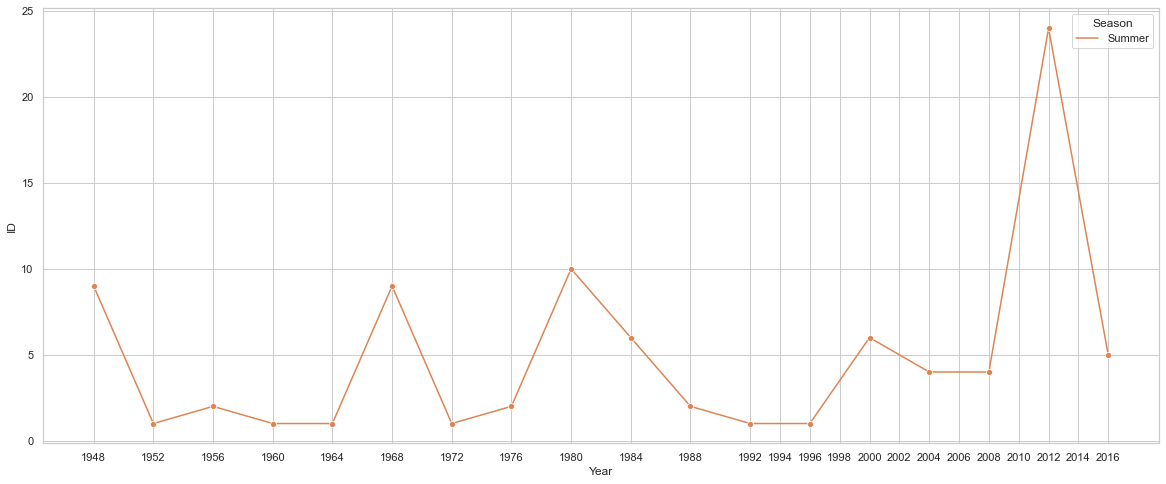

    Year       Country    City
32  1972  West Germany  Munich
[]


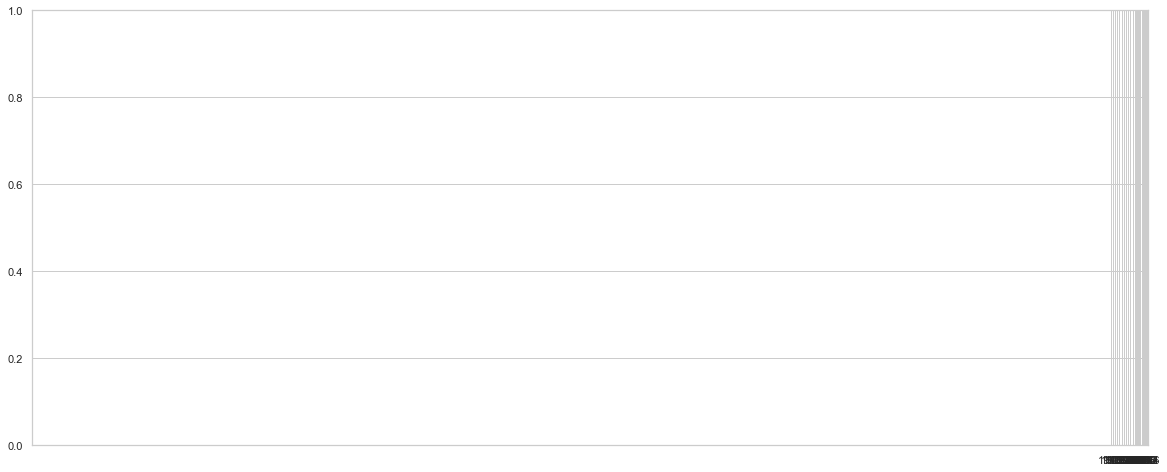

    Year Country       City
34  1976  Canada   Montreal
39  1988  Canada    Calgary
51  2010  Canada  Vancouver
['CAN' 'NFL']


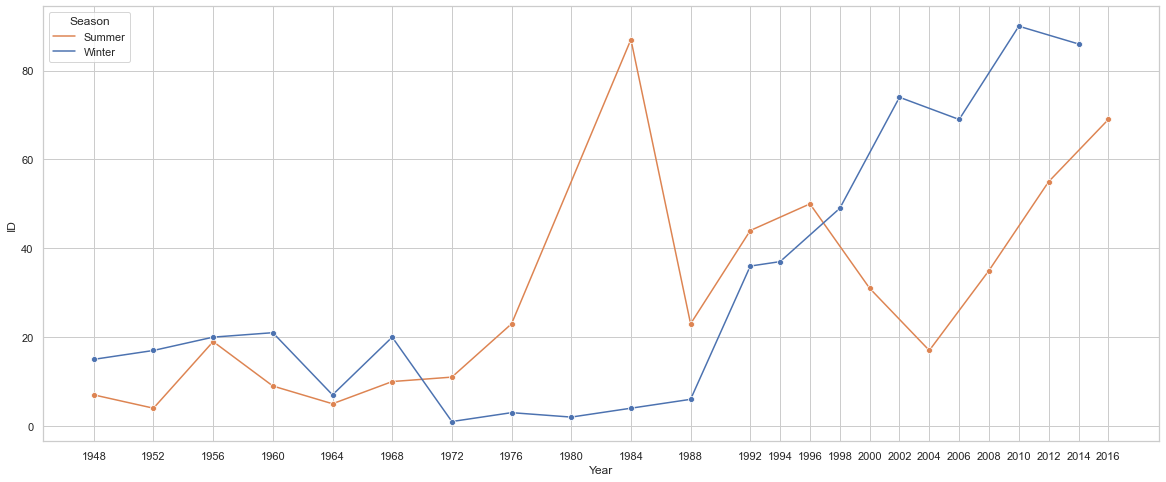

    Year       Country    City
36  1980  Soviet Union  Moscow
['URS']


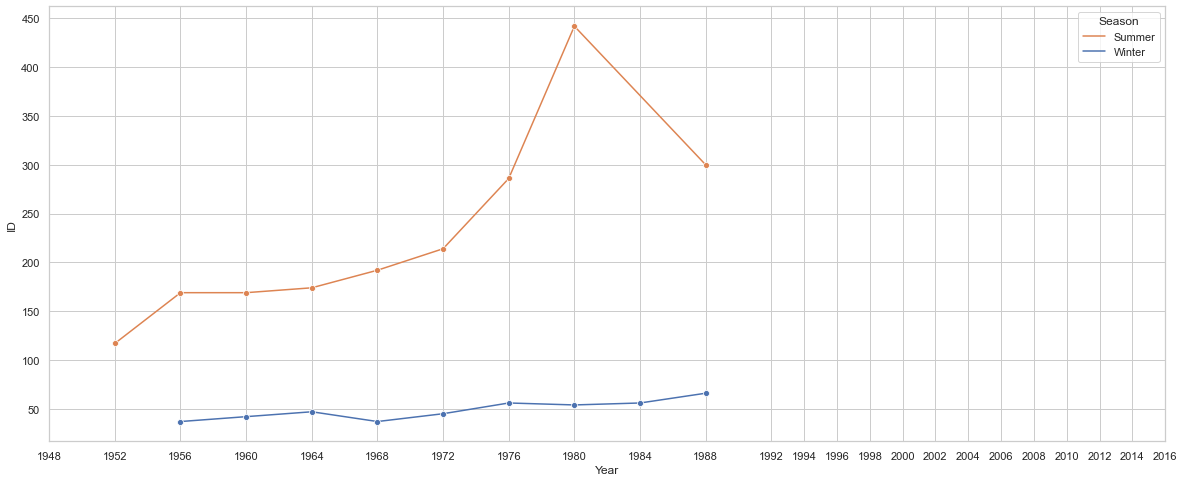

    Year     Country      City
37  1984  Yugoslavia  Sarajevo
['YUG']


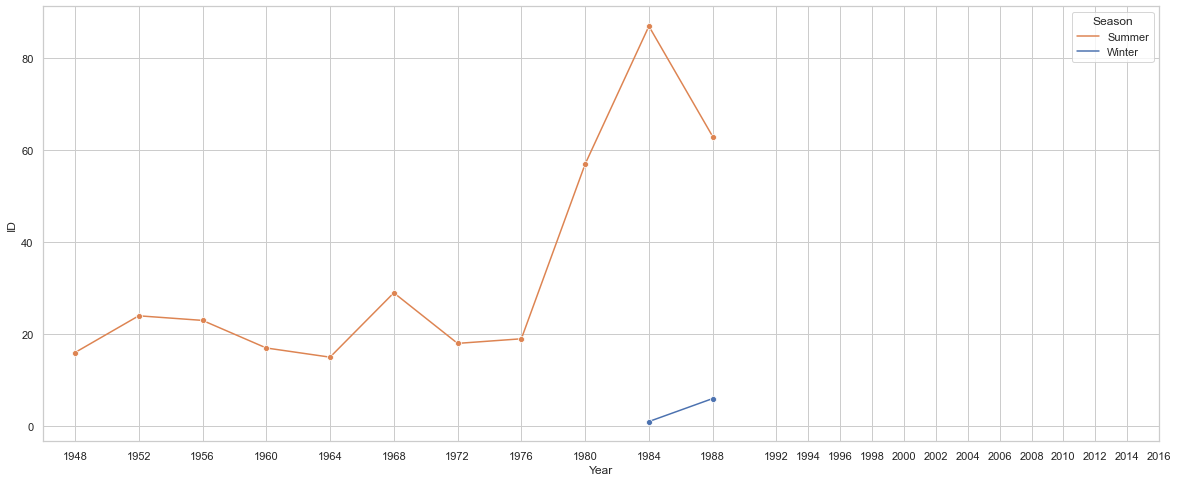

    Year      Country         City
40  1988  South Korea        Seoul
55  2018  South Korea  Pyeongchang
['KOR']


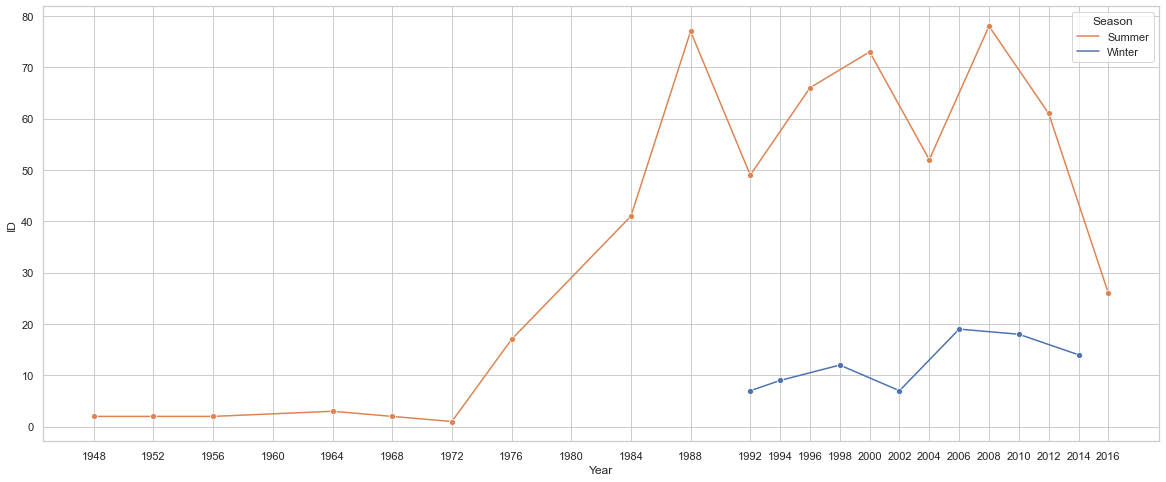

    Year Country       City
42  1992   Spain  Barcelona
['ESP']


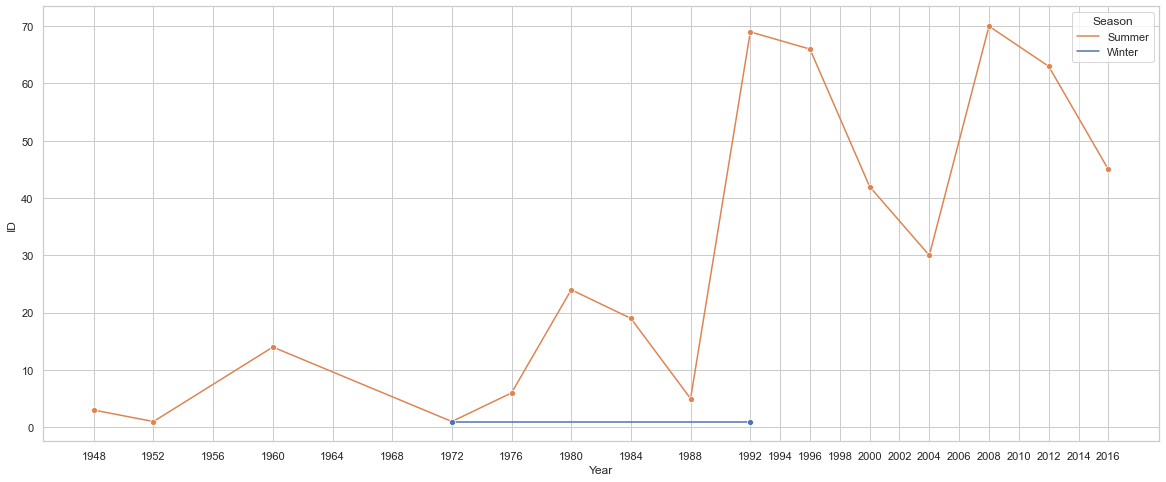

    Year Country    City
48  2004  Greece  Athens
['CRT' 'GRE']


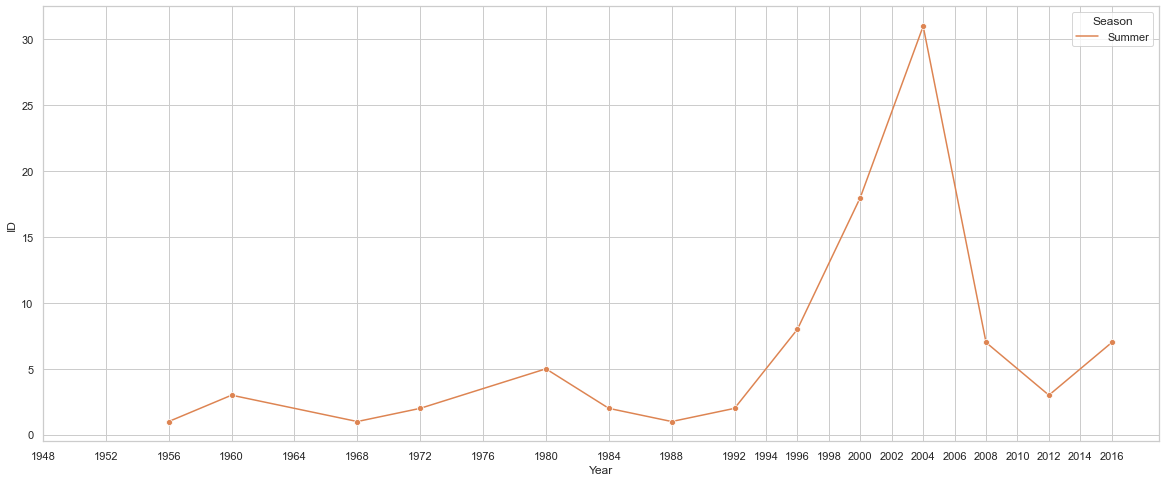

    Year Country     City
50  2008   China  Beijing
['CHN' 'HKG']


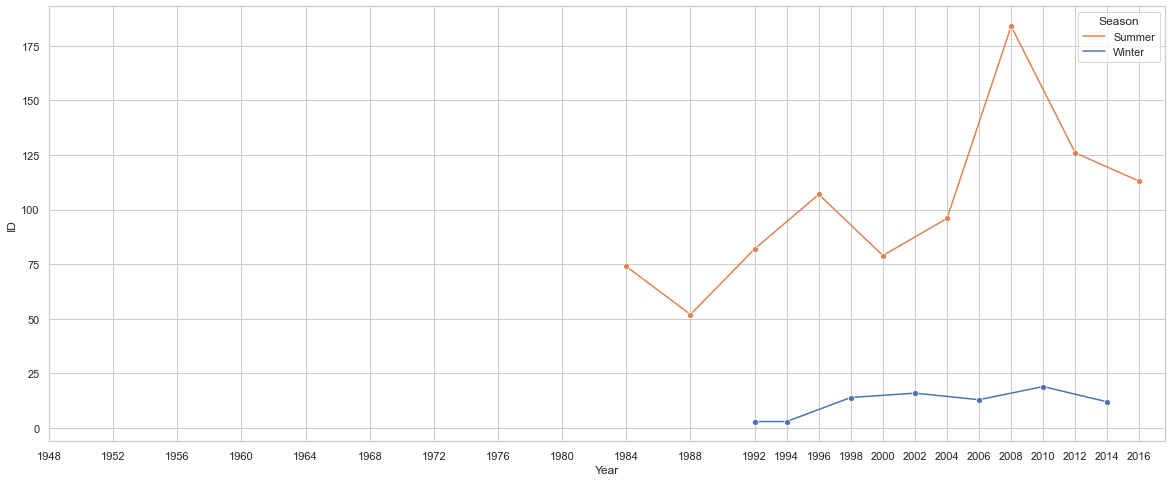

    Year Country   City
53  2014  Russia  Sochi
['EUN' 'RUS']


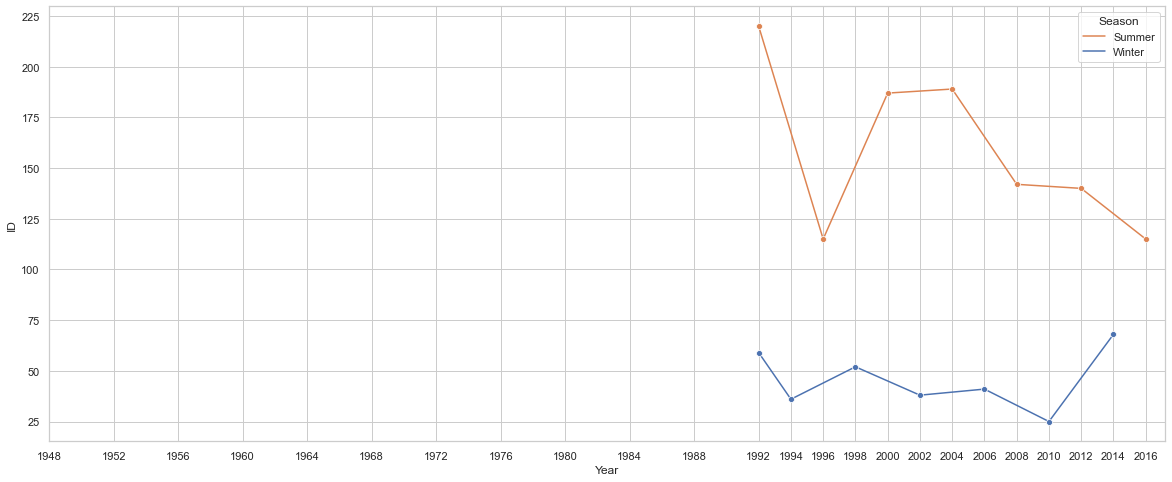

    Year Country            City
54  2016  Brazil  Rio de Janeiro
['BRA']


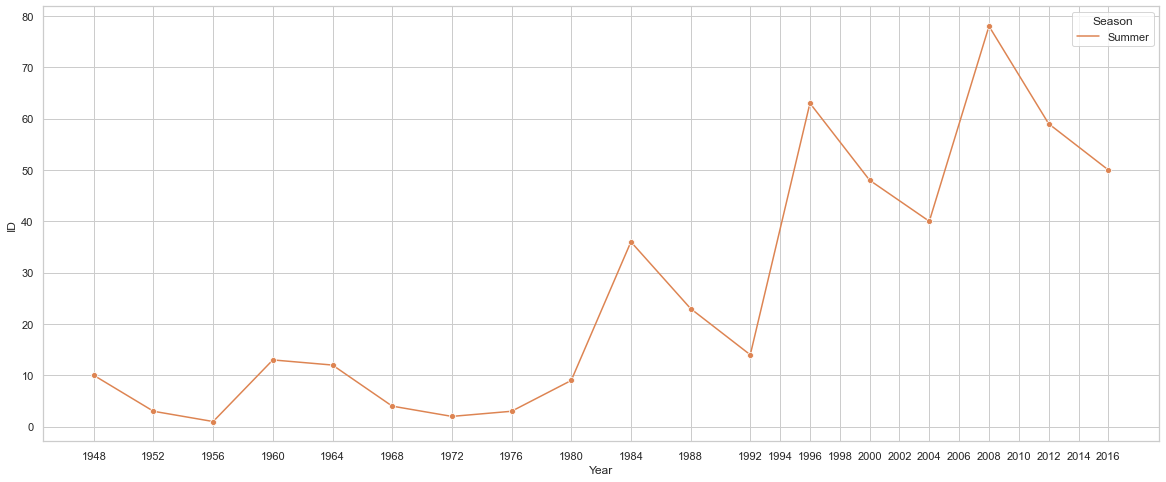

In [29]:
for country in df_hosts['Country'].unique():
    print(df_hosts[df_hosts['Country'] == country][['Year', 'Country', 'City']])
    nocs = df_nocs[df_nocs['Region'] == country]['NOC'].unique()
    print(nocs)
    
    df_medals_by_year = df_athletes[df_athletes['NOC'].isin(nocs)].dropna(subset=['Medal']).groupby(['Year', 'Season']).count().reset_index()
    
    g = sns.lineplot(data=df_medals_by_year, x="Year", y="ID", hue="Season", marker='o', palette=season_colors)
    g.set_xticks(df_athletes_by_year['Year'].unique())
    plt.show()

In [30]:
nocs_hosts = df_nocs[df_nocs['Region'].isin(df_hosts['Country'].unique())]['NOC'].unique()

In [31]:
df_medals_by_year = df_athletes[df_athletes['NOC'].isin(nocs_hosts)].dropna(subset=['Medal']) \
    .groupby(['Year', 'Season', 'NOC']).count().reset_index()

<AxesSubplot:xlabel='Year', ylabel='ID'>

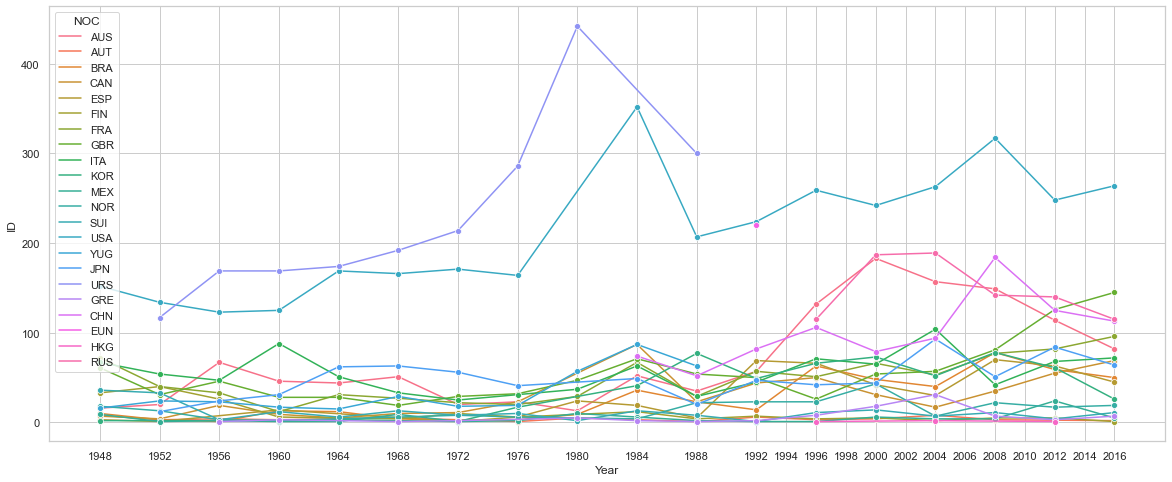

In [32]:
g = sns.lineplot(data=df_medals_by_year[df_medals_by_year['Season'] == 'Summer'], x="Year", y="ID", hue="NOC", marker='o')
g.set_xticks(df_athletes_by_year['Year'].unique())
g

In [33]:
df_hosts

,City,Country,Continent,Year,Opening Ceremony,Closing Ceremony,Season,Games
19,St. Moritz,Switzerland,Europe,1948,January 30,February 8,Winter,1948 Winter
20,London,United Kingdom,Europe,1948,July 29,August 14,Summer,1948 Summer
21,Oslo,Norway,Europe,1952,February 14,February 25,Winter,1952 Winter
22,Helsinki,Finland,Europe,1952,July 19,August 3,Summer,1952 Summer
23,Cortina d'Ampezzo,Italy,Europe,1956,January 26,February 5,Winter,1956 Winter
24,Melbourne,Australia,Oceania,1956,November 22,December 8,Summer,1956 Summer
25,Squaw Valley,United States,North America,1960,February 18,February 28,Winter,1960 Winter
26,Rome,Italy,Europe,1960,August 25,September 11,Summer,1960 Summer
27,Innsbruck,Austria,Europe,1964,January 29,February 9,Winter,1964 Winter
28,Tokyo,Japan,Asia,1964,October 10,October 24,Summer,1964 Summer


In [34]:
df_athletes['Sport'].unique()

array(['Basketball', 'Judo', 'Speed Skating', 'Cross Country Skiing',
       'Ice Hockey', 'Swimming', 'Badminton', 'Sailing', 'Biathlon',
       'Gymnastics', 'Athletics', 'Art Competitions', 'Alpine Skiing',
       'Handball', 'Weightlifting', 'Wrestling', 'Luge', 'Water Polo',
       'Hockey', 'Rowing', 'Bobsleigh', 'Football', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Fencing', 'Diving',
       'Canoeing', 'Tennis', 'Figure Skating', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Modern Pentathlon',
       'Table Tennis', 'Nordic Combined', 'Baseball',
       'Rhythmic Gymnastics', 'Freestyle Skiing', 'Rugby Sevens',
       'Trampolining', 'Beach Volleyball', 'Triathlon', 'Curling', 'Golf',
       'Snowboarding', 'Ski Jumping', 'Short Track Speed Skating',
       'Skeleton'], dtype=object)

In [35]:
df_athlets_grouped = df_athletes[df_athletes['Sport'] == 'Figure Skating'] \
    .dropna(subset=['Medal']) \
    .sort_values(['Year']) \
    .groupby(['Name', 'Event'])

<AxesSubplot:xlabel='Age', ylabel='Year'>

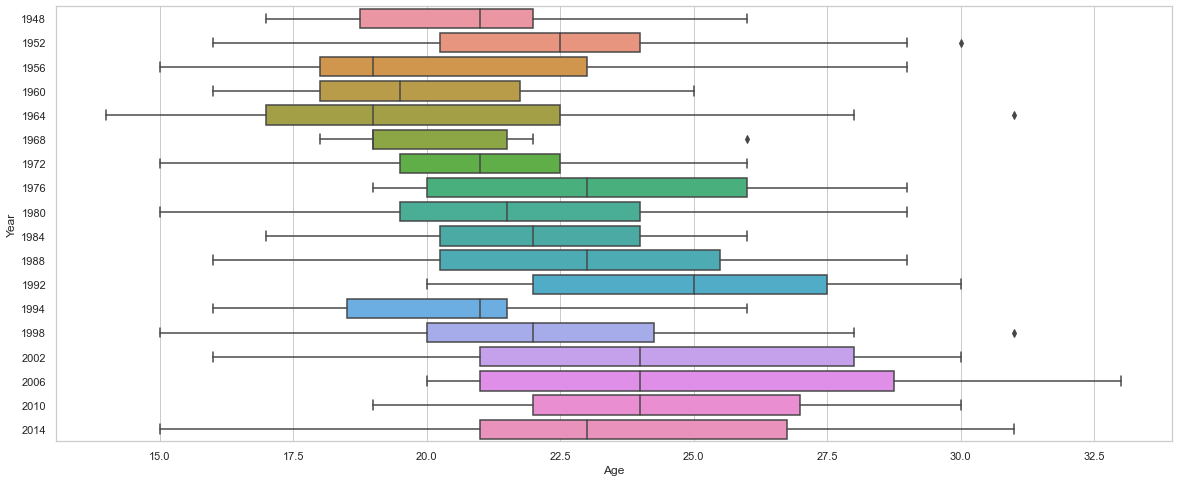

In [36]:
df_athlets_first_award = df_athlets_grouped.first()
sns.boxplot(data=df_athlets_first_award, y='Year', x='Age', orient="h")

<AxesSubplot:xlabel='Age', ylabel='Year'>

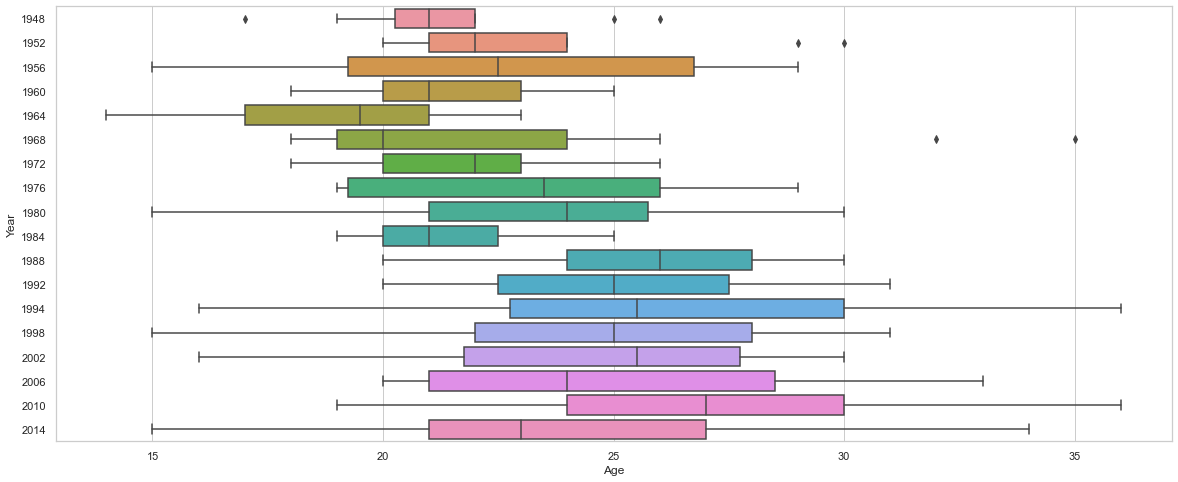

In [37]:
df_athlets_last_award = df_athlets_grouped.last()
sns.boxplot(data=df_athlets_last_award, y='Year', x='Age', orient="h")

In [38]:
df_athlets_first_award.groupby('Year').agg('mean')

,ID,Age,Height,Weight
Year,,,,
1948,55292.000000,20.750000,NaN,NaN
1952,53753.100000,22.900000,163.000000,55.500000
1956,69232.000000,20.777778,NaN,NaN
1960,64530.300000,20.000000,172.500000,63.000000
1964,58288.636364,20.454545,164.250000,64.125000
1968,79619.800000,20.200000,171.200000,62.200000
1972,83001.272727,21.000000,167.090909,59.909091
1976,63923.666667,23.200000,170.642857,62.000000
1980,67520.357143,22.000000,169.454545,58.333333


In [39]:
df_athlets_last_award.groupby('Year').agg('mean')

,ID,Age,Height,Weight
Year,,,,
1948,64341.700000,21.400000,NaN,NaN
1952,42985.777778,23.222222,NaN,NaN
1956,69222.500000,22.700000,163.000000,55.500000
1960,72207.444444,21.222222,177.000000,73.000000
1964,52601.166667,19.000000,165.777778,63.888889
1968,73644.272727,22.727273,170.090909,60.818182
1972,89409.444444,21.777778,168.888889,62.555556
1976,54523.142857,23.428571,169.000000,60.545455
1980,74570.111111,23.000000,170.000000,58.636364


In [40]:
df_medals_by_year = df_athletes.dropna(subset=['Medal']).groupby(['Year', 'Season']).count().reset_index()